In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image, display

#Make the graphs a bit prettier
plt.style.use('ggplot')

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
# Data
df2015 = pd.read_csv("data/happiness/2015.csv")
df2016 = pd.read_csv("data/happiness/2016.csv")
df2017 = pd.read_csv("data/happiness/2017.csv")
df2018 = pd.read_csv("data/happiness/2018.csv")
df2019 = pd.read_csv("data/happiness/2019.csv")

# Slicing and extracting data

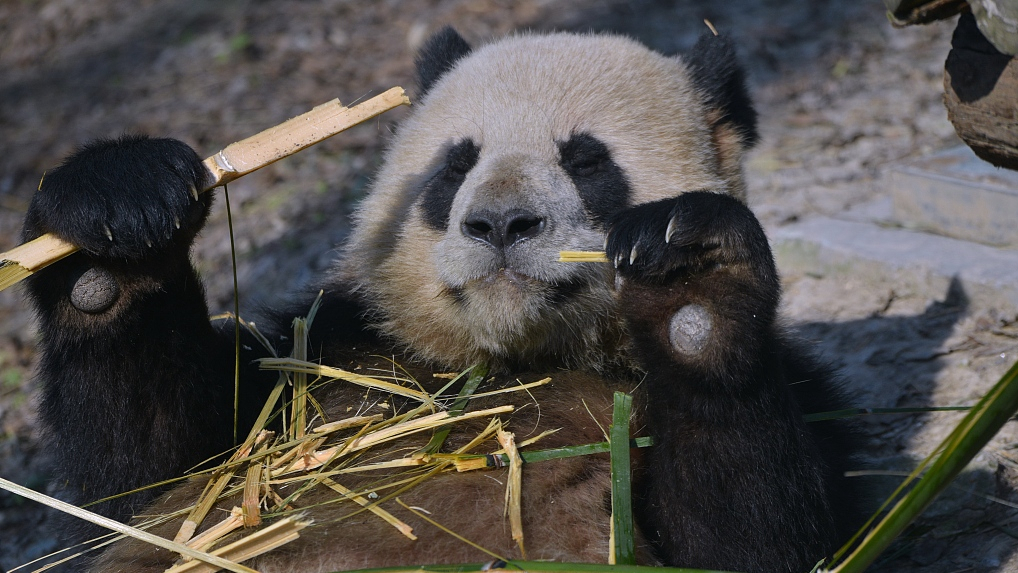

In [5]:
display(Image(filename='data/images/cute_panda_slicing.jpg'))

## Isolating one column

In [6]:
df2019["Score"]

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64

In [7]:
df2019.Score

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64

In [8]:
list(df2019.Score)

[7.769,
 7.6,
 7.554,
 7.494,
 7.488,
 7.48,
 7.343,
 7.307,
 7.278,
 7.246,
 7.228,
 7.167,
 7.139,
 7.09,
 7.054,
 7.021,
 6.985,
 6.923,
 6.892,
 6.852,
 6.825,
 6.726,
 6.595,
 6.592,
 6.446,
 6.444,
 6.436,
 6.375,
 6.374,
 6.354,
 6.321,
 6.3,
 6.293,
 6.262,
 6.253,
 6.223,
 6.199,
 6.198,
 6.192,
 6.182,
 6.174,
 6.149,
 6.125,
 6.118,
 6.105,
 6.1,
 6.086,
 6.07,
 6.046,
 6.028,
 6.021,
 6.008,
 5.94,
 5.895,
 5.893,
 5.89,
 5.888,
 5.886,
 5.86,
 5.809,
 5.779,
 5.758,
 5.743,
 5.718,
 5.697,
 5.693,
 5.653,
 5.648,
 5.631,
 5.603,
 5.529,
 5.525,
 5.523,
 5.467,
 5.432,
 5.43,
 5.425,
 5.386,
 5.373,
 5.339,
 5.323,
 5.287,
 5.285,
 5.274,
 5.265,
 5.261,
 5.247,
 5.211,
 5.208,
 5.208,
 5.197,
 5.192,
 5.191,
 5.175,
 5.082,
 5.044,
 5.011,
 4.996,
 4.944,
 4.913,
 4.906,
 4.883,
 4.812,
 4.799,
 4.796,
 4.722,
 4.719,
 4.707,
 4.7,
 4.696,
 4.681,
 4.668,
 4.639,
 4.628,
 4.587,
 4.559,
 4.548,
 4.534,
 4.519,
 4.516,
 4.509,
 4.49,
 4.466,
 4.461,
 4.456,
 4.437,
 4.418,


In [9]:
list(df2019["Country or region"])

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria',
 'Australia',
 'Costa Rica',
 'Israel',
 'Luxembourg',
 'United Kingdom',
 'Ireland',
 'Germany',
 'Belgium',
 'United States',
 'Czech Republic',
 'United Arab Emirates',
 'Malta',
 'Mexico',
 'France',
 'Taiwan',
 'Chile',
 'Guatemala',
 'Saudi Arabia',
 'Qatar',
 'Spain',
 'Panama',
 'Brazil',
 'Uruguay',
 'Singapore',
 'El Salvador',
 'Italy',
 'Bahrain',
 'Slovakia',
 'Trinidad & Tobago',
 'Poland',
 'Uzbekistan',
 'Lithuania',
 'Colombia',
 'Slovenia',
 'Nicaragua',
 'Kosovo',
 'Argentina',
 'Romania',
 'Cyprus',
 'Ecuador',
 'Kuwait',
 'Thailand',
 'Latvia',
 'South Korea',
 'Estonia',
 'Jamaica',
 'Mauritius',
 'Japan',
 'Honduras',
 'Kazakhstan',
 'Bolivia',
 'Hungary',
 'Paraguay',
 'Northern Cyprus',
 'Peru',
 'Portugal',
 'Pakistan',
 'Russia',
 'Philippines',
 'Serbia',
 'Moldova',
 'Libya',
 'Montenegro',
 'Tajikistan',
 'Croatia',
 'Hong Kong',

## Isolating multiple columns

In [10]:
df2019[["Score", "Social support"]]

,Score,Social support
0,7.769,1.587
1,7.600,1.573
2,7.554,1.582
3,7.494,1.624
4,7.488,1.522
...,...,...
151,3.334,0.711
152,3.231,0.885
153,3.203,0.517
154,3.083,0.000


## Isolating one row

In [11]:
df2019.index

RangeIndex(start=0, stop=156, step=1)

In [12]:
df2019.index == 0

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
df2019[df2019.index == 0]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


## Isolating multiple rows

In [14]:
df2019[df2019.index.isin((0, 1))]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


## Isolating rows using loc ("location") and iloc ("integer location")

In [15]:
# loc uses a label to point to a row, column or cell; iloc uses the numeric position
df2019.index

RangeIndex(start=0, stop=156, step=1)

In [16]:
df2019.index = range(1, 157)

In [17]:
df2019.index

RangeIndex(start=1, stop=157, step=1)

In [18]:
df2019.loc[1]

Overall rank                          1
Country or region               Finland
Score                             7.769
GDP per capita                     1.34
Social support                    1.587
Healthy life expectancy           0.986
Freedom to make life choices      0.596
Generosity                        0.153
Perceptions of corruption         0.393
Name: 1, dtype: object

In [19]:
df2019.iloc[1]

Overall rank                          2
Country or region               Denmark
Score                               7.6
GDP per capita                    1.383
Social support                    1.573
Healthy life expectancy           0.996
Freedom to make life choices      0.592
Generosity                        0.252
Perceptions of corruption          0.41
Name: 2, dtype: object

In [20]:
df2019.loc[1:10]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
10,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [21]:
df2019.iloc[1:10]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
10,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### Selecting specific columns

Basic syntax: `df.loc[row_label, column_label]`

In [22]:
df2019.loc[1:10, "Score"]

1     7.769
2     7.600
3     7.554
4     7.494
5     7.488
6     7.480
7     7.343
8     7.307
9     7.278
10    7.246
Name: Score, dtype: float64

In [44]:
df2019.loc[1:10, ["Country or region", "Score"]]

,Country or region,Score
1,Finland,7.769
2,Denmark,7.600
3,Norway,7.554
4,Iceland,7.494
5,Netherlands,7.488
6,Switzerland,7.480
7,Sweden,7.343
8,New Zealand,7.307
9,Canada,7.278
10,Austria,7.246


In [45]:
df2019.iloc[1:10, 1:3]

,Country or region,Score
2,Denmark,7.600
3,Norway,7.554
4,Iceland,7.494
5,Netherlands,7.488
6,Switzerland,7.480
7,Sweden,7.343
8,New Zealand,7.307
9,Canada,7.278
10,Austria,7.246


## Conditional slicing

In [46]:
df2019.index == 10

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [47]:
mask = df2019.index == 10

In [48]:
df2019[mask]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
10,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [49]:
df2019[df2019["Country or region"] == "Germany"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265


In [51]:
df2019[df2019["Overall rank"] == 100]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
100,100,Nepal,4.913,0.446,1.226,0.677,0.439,0.285,0.089


In [52]:
df2019[df2019["Healthy life expectancy"] > 0.9]["Country or region"]

1             Finland
2             Denmark
3              Norway
4             Iceland
5         Netherlands
6         Switzerland
7              Sweden
8         New Zealand
9              Canada
10            Austria
11          Australia
12         Costa Rica
13             Israel
14         Luxembourg
15     United Kingdom
16            Ireland
17            Germany
18            Belgium
20     Czech Republic
22              Malta
24             France
25             Taiwan
26              Chile
30              Spain
31             Panama
34          Singapore
36              Italy
44           Slovenia
49             Cyprus
54        South Korea
58              Japan
64    Northern Cyprus
66           Portugal
75            Croatia
76          Hong Kong
82             Greece
Name: Country or region, dtype: object

### More than one condition

In [263]:
df2019[(df2019["Healthy life expectancy"] > 0.9) & (df2019["Social support"] < 1.2)]["Country or region"]

82    Greece
Name: Country or region, dtype: object

### Using the sum() method

In [53]:
(df2019["Healthy life expectancy"] > 0.9).sum()

36

# Cleaning data

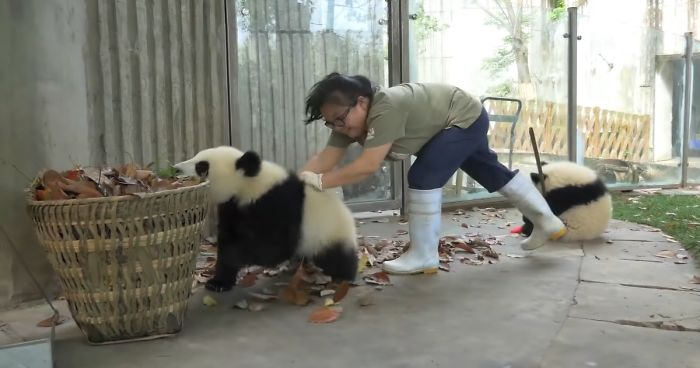

In [80]:
display(Image(filename='data/images/cute_pandas_cleaning.jpg'))

[Pandas cleaning video](https://www.youtube.com/watch?v=R2uiy27Xv_U)

In [54]:
df2019_withNulls.isnull().sum()

Overall rank                    0
Country or region               0
Score                           5
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Dropping missing values

In [55]:
df2019_withNulls.shape

(156, 9)

In [56]:
# Dropping all rows that have a null value
df2019_withoutNulls1 = df2019_withNulls.dropna().shape

In [57]:
# Dropping all columns that have a null value
df2019_withoutNulls2 = df2019_withNulls.dropna(axis=1).shape

## Replacing missing values

In [58]:
meanScore = df2019_withNulls["Score"].mean()

In [59]:
meanScore

5.338728476821191

In [60]:
# Using fillna() method
df2019_withNulls.fillna(meanScore)["Score"]

0      7.769000
1      7.600000
2      5.338728
3      5.338728
4      5.338728
         ...   
151    3.334000
152    3.231000
153    3.203000
154    3.083000
155    2.853000
Name: Score, Length: 156, dtype: float64

In [61]:
# Alternatively with loc
df2019_withNulls.loc[df2019_withNulls["Score"].isna()] = meanScore

In [62]:
df2019_withNulls["Score"]

0      7.769000
1      7.600000
2      5.338728
3      5.338728
4      5.338728
         ...   
151    3.334000
152    3.231000
153    3.203000
154    3.083000
155    2.853000
Name: Score, Length: 156, dtype: float64

## Dealing with duplicate data

In [122]:
df2019Dupl = pd.concat([df2019, df2019])

In [124]:
df2019Dupl.shape

(312, 9)

In [126]:
(df2019Dupl["Country or region"] == "Germany").sum()

2

In [128]:
df2019Dupl.drop_duplicates().shape

(156, 9)

## Renaming columns

In [64]:
df2015 = pd.read_csv("data/happiness/2015.csv")

### Renaming individual columns

In [65]:
df2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

##### What is the Dystopia Residual?

So in that report, this year the awesomest country is Finland - and then, as a baseline (and maybe to avoid dumping on Afghanistan all the time) they make up a hypothetical worst-country-in-the-world, which has the Central African Republic's life expectancy, Somalia's corruption, and so on. They call that country Dystopia.
If you draw a line connecting those two countries, that line gives you a rough idea how fast happiness increases as you improve the various criteria.

If you plug your country's life expectancy, corruption, etc into the line equation, it'll predict what your happiness rating should be. BUT...most countries don't fit the model perfectly. They're usually a little higher or lower than the prediction. The difference between the prediction and the actual value is called the residual. A positive residual means you're, for some reason, happier than the model would predict, and a negative residual means you're less happy for some reason. And a zero residual means you're exactly where the model predicted.

In the data spreadsheet, instead of giving raw residuals, they give "residual + Dystopia", and I'm not sure why they do that. Dystopia's happiness rating is 1.97, so if you take all those values and subtract 1.97 you'll see the actual residuals. Singapore and Hong Kong, for example, have conspicuously low ones; something's going on in Hong Kong that their model doesn't normally look at, which is making the citizens less happy. Finland's residual is substantial and positive, so the model says they should be quite happy, and in fact they're even happier than that.

Copied from [here](https://www.reddit.com/r/explainlikeimfive/comments/jdai5y/eli5_what_does_dystopian_residual_mean/).

In [69]:
df2015 = df2015.rename(columns={"Happiness Rank": "Rank", "Happiness Score": "Score"})

In [70]:
df2015.columns

Index(['Country', 'Region', 'Rank', 'Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [71]:
df2015.Region

0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object

### Renaming all columns

In [75]:
newColumnNames = ["These", "are", "just", "some", "really", "random", "column", "names", "that", "dont", 
                  "mean", "anything"]

In [76]:
df2015.columns = newColumnNames

In [77]:
df2015

,These,are,just,some,really,random,column,names,that,dont,mean,anything
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Replacing values

In [134]:
df2019["Country or region"].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [136]:
df2019 = df2019.replace({"Country or region": {"Germany": "Schland", "United States": "Murica", 
                                               "Australia": "Oz"}})

In [139]:
sorted(df2019["Country or region"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Lib